# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Признаки:
 - satisfaction_level - Уровень удовлетворенности работой
 - Last_evaluation - Время с момента последней оценки в годах
 - number_projects - Количество проектов, выполненных за время работы
 - average_monthly_hours - Среднее количество часов на рабочем месте в месяц
 - time_spend_company - Стаж работы в компании в годах
 - work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
 - left - уволился ли сотрудник
 - promotion_last_5years - повышался ли сотрудник за последние пять лет
 - department - отдел в котором работает сотрудник
 - salary - относительный уровень зарплаты
 
 **Требуется выполнить следующее задание:**
 
 - Загрузите файл HR.csv в pandas dataframe
 - Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).
 - Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименее скоррелированные переменные.
 - Рассчитайте сколько сотрудников работает в каждом департаменте.
 - Показать распределение сотрудников по зарплатам.
 - Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
 - Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
 - Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
  - Доля сотрудников с повышением за последние 5 лет
  - Средняя степень удовлетворенности
  - Среднее количество проектов
 - Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary) Оценить качество модели на тестовой выборки
 - Загрузить jupyter notebook с решение на github и прислать ссылку

# Загрузите файл HR.csv в pandas dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [2]:
# можно с помощью метода describe
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
# отдельно для каждого столбца
columns = ['satisfaction_level',
           'last_evaluation',
           'number_project',
           'average_montly_hours',
           'time_spend_company',
           'Work_accident',
           'left',
           'promotion_last_5years',
           'department',
           'salary']
names = []
stat = {}
stat['mean'] = []
stat['median'] = []
stat['mode'] = []
stat['min'] = []
stat['max'] = []
stat['std'] = []
for name in columns:
    if df[name].dtypes == 'float64' or df[name].dtypes == 'int64' :
        names.append(name)
        stat['mean'].append(statistics.mean(df[name]))
        stat['median'].append(statistics.median(df[name]))
        try:
            stat['mode'].append(statistics.mode(df[name]))
        except:
            tmp = {}
            for i in df[name]:
                if i in tmp:
                    tmp[i] += 1
                else:
                    tmp[i] = 1
            max_val = 0
            duration = None
            for key, val in tmp.items():
                if max_val < val:
                    max_val = val
                    duration = key
            stat['mode'].append(duration)
        stat['min'].append(min(df[name]))
        stat['max'].append(max(df[name]))
        stat['std'].append(statistics.pstdev(df[name]))

pd.DataFrame(stat, index = names)

,mean,median,mode,min,max,std
satisfaction_level,0.612834,0.64,0.10,0.09,1.0,0.248622
last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171163
number_project,3.803054,4.00,4.00,2.00,7.0,1.232551
average_montly_hours,201.050337,200.00,135.00,96.00,310.0,49.941434
time_spend_company,3.498233,3.00,3.00,2.00,10.0,1.460088
Work_accident,0.144610,0.00,0.00,0.00,1.0,0.351707
left,0.238083,0.00,0.00,0.00,1.0,0.425910
promotion_last_5years,0.021268,0.00,0.00,0.00,1.0,0.144277


# Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

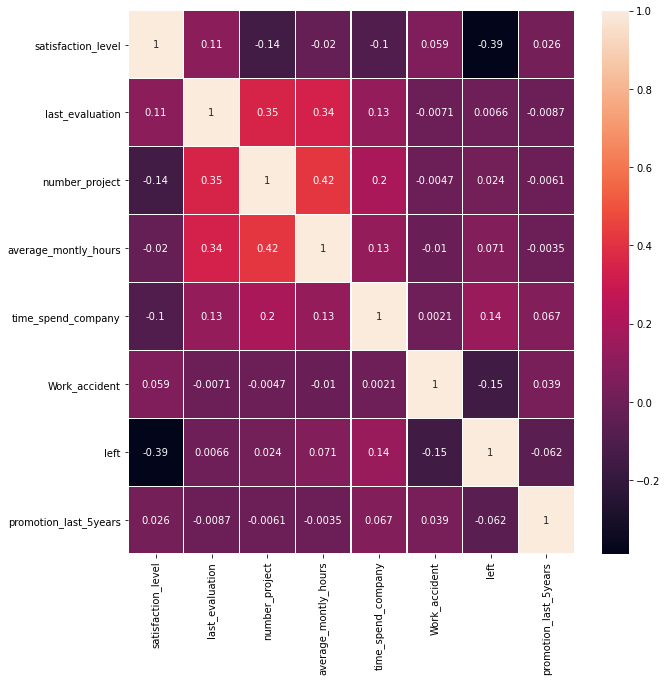

In [4]:
sns.heatmap(df.corr(), linewidths = 0.4, annot = True)
f = plt.gcf()
f.set_size_inches(10, 10)
plt.show()

- "Время с момента последней оценки в годах" и "Количество проектов, выполненных за время работы" положительно коррелируют со "Среднее количество часов на рабочем месте в месяц"
- "Количество проектов, выполненных за время работы" положительно коррелируют с "Время с момента последней оценки в годах"
- "Происходили ли несчастные случаи на рабочем месте с сотрудником" отрицательно коррелирует с "уволился ли сотрудник"
- "Уровень удовлетворенности работой" отрицательно коррелирует с "уволился ли сотрудник"

# Рассчитайте сколько сотрудников работает в каждом департаменте.

In [5]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# Показать распределение сотрудников по зарплатам.

In [6]:
df_salary = df['salary'].value_counts()
df_salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

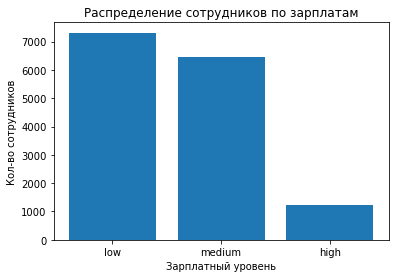

In [7]:
plt.bar(['low', 'medium' ,'high'], df_salary)
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплатный уровень')
plt.ylabel('Кол-во сотрудников')
plt.show()

# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

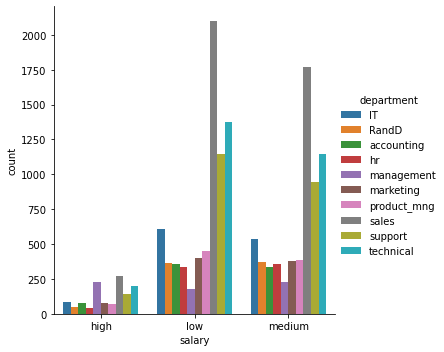

In [8]:
def get_cnt(data):
    return data.department.count()
df_salary = df.groupby(['department','salary']).apply(get_cnt).reset_index()
df_salary.columns = ['department', 'salary', 'count']
sns.catplot(data = df_salary, hue = 'department', x = 'salary', y = 'count', kind = 'bar')

У сейлзов ЗП заметно выше

# Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [9]:
df.groupby(by = 'salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Сгруппировав датафрейм по уровню ЗП, можно заметить, что средние значение отличается не сильно. Все сотрудники проводят примерно одинаковое кол-во времени на работе.

# Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [10]:
df_working = df[df.left == 0]
df_left = df[df.left == 1]

working_val = round(df_working.promotion_last_5years.value_counts(normalize = True)[1]*100, 2)
left_val = round(df_left.promotion_last_5years.value_counts(normalize = True)[1]*100, 2)
print("Доля сотрудников с повышением за последние 5 лет (из неуволившихся):", working_val)
print("Доля сотрудников с повышением за последние 5 лет (из уволившихся):", left_val)
print('--------')

working_val = round(df_working.satisfaction_level.mean(), 2)
left_val = round(df_left.satisfaction_level.mean(), 2)
print("Средняя степень удовлетворенности (из неуволившихся):", working_val)
print("Средняя степень удовлетворенности (из уволившихся):", left_val)
print('--------')

working_val = round(df_working.number_project.mean(), 2)
left_val = round(df_left.number_project.mean(), 2)
print("Среднее количество проектов (из неуволившихся):", working_val)
print("Среднее количество проектов (из уволившихся):", left_val)

Доля сотрудников с повышением за последние 5 лет (из неуволившихся): 2.63
Доля сотрудников с повышением за последние 5 лет (из уволившихся): 0.53
--------
Средняя степень удовлетворенности (из неуволившихся): 0.67
Средняя степень удовлетворенности (из уволившихся): 0.44
--------
Среднее количество проектов (из неуволившихся): 3.79
Среднее количество проектов (из уволившихся): 3.86


# Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки

In [11]:
Y = df.left
X = df.drop(['department', 'salary'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
print('Расчет точности:', accuracy_score(Y_test, lda.predict(X_test)))

Расчет точности: 0.755
